In [1]:
import pandas as pd #data manipulation and analysis
import numpy as np #data arrays
from datetime import datetime #datetime
from datetime import time
from datetime import timedelta
import datetime
import glob #join csv's together
import os # makes file join OS independent
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #data visualisation
from geopy import distance # Vincenty formula for latitude and longitude distance calculations

In [2]:
#load downloaded csv in, change date strings to datetime64 (date/time format)
#define variables that we will use for concatenating
path =r'C:\Users\zaydm\Documents\Repos\Google_Data_Analytics_Capstone\CSV files'
file_type = 'csv'
seperator =','

#define our dataframe. Change date strings to datetime64 
#'infer_datetime_format' infers the format of the datetime strings - in this case parsing speed = 10x faster
bike_share = pd.concat([pd.read_csv(f, sep=seperator,parse_dates=['started_at', 'ended_at'],infer_datetime_format=True, dayfirst=True) 

#using glob/for loop to find the csv files from the specified folder to join them together
for f in glob.glob(os.path.join(path + "/*."+file_type))],ignore_index=True)

#rename datetime columns so they're better defined
bike_share.rename(columns= {'started_at' : 'start_time','ended_at' : 'end_time' }, inplace=True)

In [3]:
#The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality. These are not needed
bike_share.drop(index=bike_share[bike_share['rideable_type'] =='docked_bike'].index, inplace=True)

bike_share['rideable_type'].unique()

array(['electric_bike', 'classic_bike'], dtype=object)

In [4]:
#create new column that displays ride length
bike_share['ride_length'] = bike_share['end_time'] - bike_share['start_time']

#create ride length in seconds for analysis. The error below is false positive 
bike_share['ride_length_seconds'] = bike_share['ride_length'].dt.total_seconds()

In [5]:
bike_share.head(5)

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_seconds
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,177.0
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,261.0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,261.0
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,896.0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,362.0


In [6]:
#get day of week (dow) integer for the dates in "start time" column.
bike_share['day_of_week'] = bike_share['start_time'].dt.dayofweek

days = {0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7}
bike_share['day_of_week'] = bike_share['day_of_week'].replace(days)

In [7]:
bike_share.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_seconds,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,177.0,4
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,261.0,1
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,261.0,2
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,896.0,2
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,362.0,4


In [8]:
missing_values_count = bike_share.isnull().sum()

missing_values_count[:]
#We can see from start_station_id there are 34840 missing values and from end_station_id there are 38282 missing values

ride_id                    0
rideable_type              0
start_time                 0
end_time                   0
start_station_name     34840
start_station_id       34840
end_station_name       38247
end_station_id         38247
start_lat                  0
start_lng                  0
end_lat                  128
end_lng                  128
member_casual              0
ride_length                0
ride_length_seconds        0
day_of_week                0
dtype: int64

In [9]:
#since we can't create start/end station names, we can drop the entire rows using dropna()
bike_share = bike_share.dropna()

#second check ensuring we have no null values
missing_values_count_2 = bike_share.isnull().sum()
missing_values_count_2[:]

ride_id                0
rideable_type          0
start_time             0
end_time               0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
start_lat              0
start_lng              0
end_lat                0
end_lng                0
member_casual          0
ride_length            0
ride_length_seconds    0
day_of_week            0
dtype: int64

In [10]:
#checking to ensure no duplicate ride_id
unique_id = len(pd.unique(bike_share["ride_id"]))

print("# of unique Id: " + str(unique_id))

# of unique Id: 167019


In [11]:
#checking for any negative ride lengths as previous year data had some errors
neg_time = bike_share[bike_share['ride_length_seconds'] < 0]
print(neg_time)

Empty DataFrame
Columns: [ride_id, rideable_type, start_time, end_time, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, ride_length, ride_length_seconds, day_of_week]
Index: []


After realising we have both lat and long start and finish points, we can work out the distance between the start and finish times. Its important to note that whilst these wont tell us the exact distance of the rides as it'll work out the path in a straight line and ofcourse won't include roads,obstructions etc. The purpose of this calculation is to see how much riders travel relative to each other and then compare volumes too. For e.g. member rides ride on average 7 miles on each trip, casual riders ride 10 miles on each trip. We then see volume on weekdays - this could indicate that member riders are commuting - faster speeds, same distance whereas the casual riders are riding more on weekends, slower speeds but longer distances. 

In [12]:
index_0_start = (42.012800,	-87.665906)
index_0_end = (42.012560,	-87.674367)
print(distance.distance(index_0_start, index_0_end).miles)

0.43580980480248127


In [13]:
#change latitude and longitude columns from string to float
bike_share.astype({'start_lat':'float', 'start_lng':'float', 'end_lat':'float', 'end_lng':'float'})
bike_share.dtypes

ride_id                         object
rideable_type                   object
start_time              datetime64[ns]
end_time                datetime64[ns]
start_station_name              object
start_station_id                object
end_station_name                object
end_station_id                  object
start_lat                      float64
start_lng                      float64
end_lat                        float64
end_lng                        float64
member_casual                   object
ride_length            timedelta64[ns]
ride_length_seconds            float64
day_of_week                      int64
dtype: object

In [14]:
#Joining latitude and longitude in a single column to provide a start/end location
bike_share['start_lat_long'] = [', '.join(str(x) for x in y) for y in map(tuple, bike_share[['start_lat', 'start_lng']].values)]
bike_share['end_lat_long'] = [', '.join(str(x) for x in y) for y in map(tuple, bike_share[['end_lat', 'end_lng']].values)]

In [15]:
index_0_start = ('41.89571428, -87.6722095')
index_0_end = ('41.879255, -87.639904')
print(distance.distance(index_0_start, index_0_end).miles)
#Vincenty distance (vincenty) uses a more accurate ellipsoidal model of the earth.

2.016462858476188


In [16]:
# Geopy can calculate geodesic distance between two points. The geodesic distance is the shortest distance on the surface of an ellipsoidal model of the earth. 
# The default algorithm uses the method is given by Karney (2013) (geodesic); this is accurate to round-off and always converges.
# To allow for it to work for columns, we define distancer and use row to allow each ID's distance to be calculated and then placed into the journey distance column
# Apply does take some time to execute
# Uk units = miles
def distancer(row):
    coords_1 = (row['start_lat_long'])
    coords_2 = (row['end_lat_long'])
    return distance.distance(coords_1, coords_2).miles

bike_share['journey_distance_miles'] = bike_share.apply(distancer, axis=1)

In [17]:
bike_share.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_seconds,day_of_week,start_lat_long,end_lat_long,journey_distance_miles
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,177.0,4,"42.0128005, -87.665906","42.01256011541, -87.6743671152",0.435817
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,261.0,1,"42.012763, -87.6659675","42.01256011541, -87.6743671152",0.432562
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,261.0,2,"41.9256018819, -87.6537080423","41.92533, -87.6658",0.623515
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,896.0,2,"41.983593, -87.669154","41.961507, -87.671387",1.528651
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,362.0,4,"41.87785, -87.62408","41.88462107257936, -87.62783423066139",0.505842


In [18]:
#drop columns we no longer need - cleaner DF
bike_share.drop(columns= ['start_lat', 'start_lng','end_lat', 'end_lng'], inplace=True)

In [19]:
bike_share.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,ride_length_seconds,day_of_week,start_lat_long,end_lat_long,journey_distance_miles
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,0 days 00:02:57,177.0,4,"42.0128005, -87.665906","42.01256011541, -87.6743671152",0.435817
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,0 days 00:04:21,261.0,1,"42.012763, -87.6659675","42.01256011541, -87.6743671152",0.432562
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,0 days 00:04:21,261.0,2,"41.9256018819, -87.6537080423","41.92533, -87.6658",0.623515
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,0 days 00:14:56,896.0,2,"41.983593, -87.669154","41.961507, -87.671387",1.528651
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,0 days 00:06:02,362.0,4,"41.87785, -87.62408","41.88462107257936, -87.62783423066139",0.505842


In [20]:
mc_type = bike_share.groupby('member_casual')
mc_type['ride_length_seconds'].mean()

member_casual
casual    1083.350012
member     627.947491
Name: ride_length_seconds, dtype: float64

In [21]:
mc_day_type = bike_share.groupby(['member_casual','day_of_week'])

bike_share_mean = mc_day_type['ride_length_seconds'].mean().reset_index()

In [22]:
weekday = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat', 7:'Sun'}

bike_share_mean['day_of_week'] = bike_share_mean['day_of_week'].replace(weekday)

bike_share_mean.set_index(['member_casual', 'day_of_week'], inplace = True)

bike_share_mean['ride_length_mins'] =bike_share_mean['ride_length_seconds'].astype('m8[m]')

bike_share_mean

ride_length_seconds ride_length_mins
member_casual day_of_week                                      
casual        Mon                  1189.811076  0 days 19:49:00
              Tue                   975.144537  0 days 16:15:00
              Wed                   997.779924  0 days 16:37:00
              Thur                  926.678722  0 days 15:26:00
              Fri                  1003.430480  0 days 16:43:00
              Sat                  1091.172324  0 days 18:11:00
              Sun                  1274.848961  0 days 21:14:00
member        Mon                   632.176459  0 days 10:32:00
              Tue                   607.971865  0 days 10:07:00
              Wed                   606.826445  0 days 10:06:00
              Thur                  603.200544  0 days 10:03:00
              Fri                   640.980476  0 days 10:40:00
              Sat                   638.655009  0 days 10:38:00
              Sun                   687.658034  0 days 11:27:00

In [23]:
volume_count =mc_day_type[['journey_distance_miles','ride_length_seconds']].mean().reset_index()

volume_count['day_of_week'] = volume_count['day_of_week'].replace(weekday)

volume_count.set_index(['member_casual', 'day_of_week'], inplace = True)

volume_count['ride_length_mins'] =volume_count['ride_length_seconds'].astype('m8[m]')

volume_count.head()

journey_distance_miles  ride_length_seconds  \
member_casual day_of_week                                                
casual        Mon                        1.161229          1189.811076   
              Tue                        1.088365           975.144537   
              Wed                        1.122839           997.779924   
              Thur                       1.070813           926.678722   
              Fri                        1.304461          1003.430480   

                          ride_length_mins  
member_casual day_of_week                   
casual        Mon          0 days 19:49:00  
              Tue          0 days 16:15:00  
              Wed          0 days 16:37:00  
              Thur         0 days 15:26:00  
              Fri          0 days 16:43:00

In [24]:
mc_type[['ride_length_seconds','journey_distance_miles']].mean()

,ride_length_seconds,journey_distance_miles
member_casual,,
casual,1083.350012,1.152687
member,627.947491,1.066377


total average ride length, median, max, min. TYPE OF BIKE

In [25]:
global_desc = bike_share[['ride_length_seconds','journey_distance_miles']].describe().applymap('{:.1f}'.format)

global_desc

,ride_length_seconds,journey_distance_miles
count,167019.0,167019.0
mean,697.4,1.1
std,1300.8,2.0
min,0.0,0.0
25%,300.0,0.5
50%,480.0,0.8
75%,780.0,1.3
max,88628.0,740.8


In [26]:
#we have two bike types. groupby bike type and then find the mean of the ride length and distance
bike_type = bike_share.groupby(['rideable_type'])

bike_type_avg = bike_type[['ride_length_seconds','journey_distance_miles']].mean().reset_index()

bike_type_avg.set_index(('rideable_type'), inplace = True)

bike_type_avg

,ride_length_seconds,journey_distance_miles
rideable_type,,
classic_bike,736.553072,0.995423
electric_bike,613.316541,1.259992


In [27]:
bike_types = bike_type['ride_id'].count().reset_index()

bike_types.set_index('rideable_type')


,ride_id
rideable_type,
classic_bike,113920
electric_bike,53099


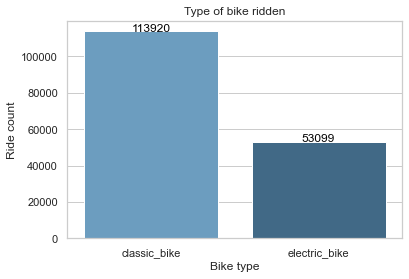

In [28]:
sns.set_theme(style='whitegrid')
ride_types = sns.barplot(x= 'rideable_type', y='ride_id', data=bike_types, palette='Blues_d')
plt.xlabel("Bike type")
plt.ylabel("Ride count")
plt.title("Type of bike ridden")

# loop through all bars of the barplot
for rc, i in enumerate(ride_types.patches):

    # height of bar, which is basically the data value
    height = i.get_height() 

    # add text to specified position
    ride_types.text(
        # bar to which data label will be added 
        # x-coordinate of the data label
        rc, 

        # height of data label: height +1500 (+1500 as we're working in the 100k range)
        height+1500, 

        # formatting of data label
        '{}'.format(int(height)), 

        # color of data label
        color='black', 

        # size of data label
        fontsize=12,

        # horizontal alignment: possible values are center, right, left
        ha='center', 

        # vertical alignment: possible values are top, bottom, center, baseline
        va='center'
    )


In [29]:
weekday = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat', 7:'Sun'}

grouped_dist = bike_share.groupby(['member_casual','day_of_week'])[['journey_distance_miles','ride_length_seconds']].mean().reset_index()
grouped_dist['day_of_week']= grouped_dist['day_of_week'].replace(weekday)
grouped_dist['ride_length_mins'] =grouped_dist['ride_length_seconds']/60
grouped_dist

,member_casual,day_of_week,journey_distance_miles,ride_length_seconds,ride_length_mins
0,casual,Mon,1.161229,1189.811076,19.830185
1,casual,Tue,1.088365,975.144537,16.252409
2,casual,Wed,1.122839,997.779924,16.629665
3,casual,Thur,1.070813,926.678722,15.444645
4,casual,Fri,1.304461,1003.430480,16.723841
5,casual,Sat,1.126692,1091.172324,18.186205
6,casual,Sun,1.177478,1274.848961,21.247483
7,member,Mon,1.096914,632.176459,10.536274
8,member,Tue,1.090527,607.971865,10.132864
9,member,Wed,1.065407,606.826445,10.113774


Text(0.5, 1.0, 'Average ride distance across member types (Jan-Feb 2022)')

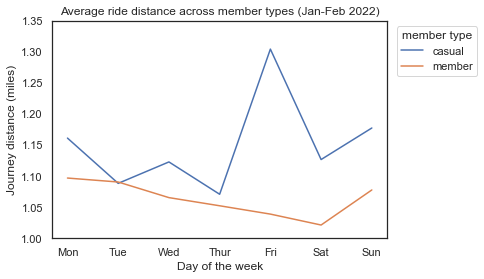

In [30]:
#avg_ride = sns.load_dataset(grouped_dist)

sns.set_theme(style='white')
ax = sns.lineplot(x= 'day_of_week', y= 'journey_distance_miles', hue='member_casual', data = grouped_dist)
ax.set_ylim(1,1.35)

plt.legend(bbox_to_anchor=(1.15, 1), loc = 'upper center', title='member type')
plt.xlabel('Day of the week')
plt.ylabel('Journey distance (miles)')
plt.title('Average ride distance across member types (Jan-Feb 2022)')


Text(0.5, 1.0, 'Average ride duration across member types (Jan-Feb 2022)')

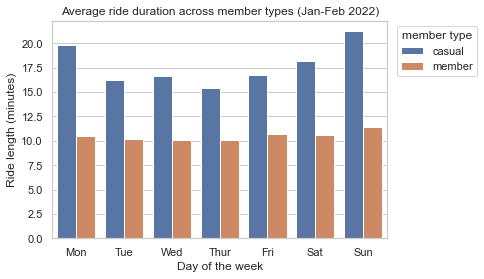

In [31]:
#choose theme
sns.set_theme(style='whitegrid')
#choose data for the barchart
ax = sns.barplot(x= 'day_of_week', y= 'ride_length_mins', hue='member_casual', data = grouped_dist)

# adding annotations and visuals
plt.legend(bbox_to_anchor=(1.15, 1), loc = 'upper center', title='member type')
plt.xlabel('Day of the week')
plt.ylabel('Ride length (minutes)')
plt.title('Average ride duration across member types (Jan-Feb 2022)')

In [32]:
#we want to see the type of rider and what bike they use 
mc_type['rideable_type'].count()

rider_type = bike_share.groupby(['member_casual','rideable_type']).count()
rider_type = rider_type['ride_id'].reset_index()
rider_type

,member_casual,rideable_type,ride_id
0,casual,classic_bike,14952
1,casual,electric_bike,10510
2,member,classic_bike,98968
3,member,electric_bike,42589


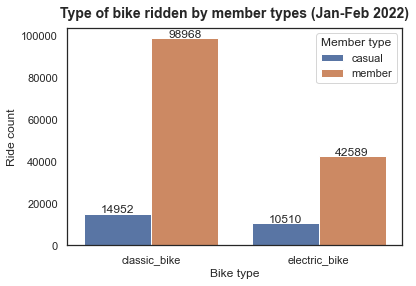

In [33]:
sns.set_theme(style='white')
riders = sns.barplot(x= 'rideable_type', y= 'ride_id', hue='member_casual', data = rider_type)
plt.xlabel('Bike type')
plt.ylabel('Ride count')
plt.legend(title= 'Member type')
plt.title('Type of bike ridden by member types (Jan-Feb 2022)',fontsize = 14, pad= 10, weight = 'semibold')

for container in riders.containers:
    riders.bar_label(container, padding=-1)


Text(0.5, 1.0, 'Member user by bike type (Jan-Feb 2022)')

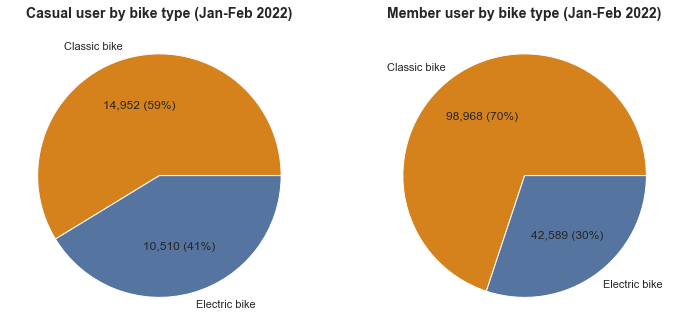

In [34]:
Casual = {'Classic bike':14952, 'Electric bike':10510 }
Member = {'Classic bike':98968, 'Electric bike':42589 }

labels_0 = list(Casual.keys())
labels_1 = list(Member.keys())

values_0 = list(Casual.values())
values_1 = list(Member.values())

colours = ['#d5821d','#55749f']
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#piechart for classic bike, lambda function to show % share and int value of results
axs[0].pie(values_0,labels = labels_0, colors = colours,autopct = lambda p:f'{p*sum(values_0)/100 :,.0f} ({p:.0f}%)')
axs[0].set_title('Casual user by bike type (Jan-Feb 2022)', fontsize = 14, weight = 'semibold')

#piechart for electric bike, lambda function to show % share and int value of results
axs[1].pie(values_1,labels = labels_1, colors = colours,autopct = lambda p:f'{p*sum(values_1)/100 :,.0f} ({p:.0f}%)')
axs[1].set_title('Member user by bike type (Jan-Feb 2022)', fontsize = 14, weight = 'semibold')

In [42]:
bike_share.to_csv('C:/Users/zaydm/Documents/Repos/Google_Data_Analytics_Capstone/bike_share_small.csv')